In [9]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import os,warnings,datetime,time

import torch
import pandas as pd
import seaborn as sns

from rtlsdr import *

from scipy.fftpack import fft
from scipy.signal import kais

warnings.filterwarnings('ignore')
sns.set()

In [71]:
try: 
    sdr.close()
    sdr = RtlSdr(device_index=1)
except:
    sdr = RtlSdr(device_index=1)

sdr.sample_rate = 1*1024000.0
sdr.center_freq = 99.5e6    
sdr.freq_correction = 60

sdr.gain = 'auto'

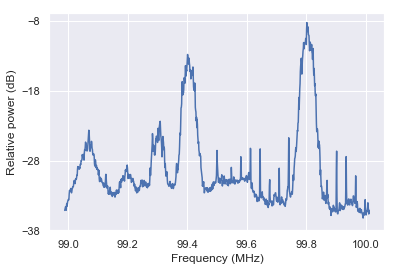

In [78]:
samples = sdr.read_samples(256*1024)

plt.psd(samples, NFFT=1024, Fs=sdr.sample_rate/1e6, Fc=sdr.center_freq/1e6)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative power (dB)')

plt.show()

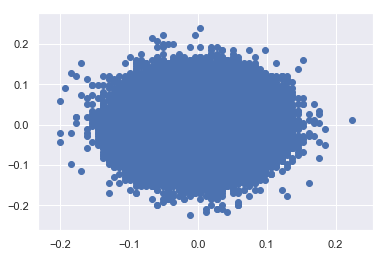

In [79]:
plt.scatter(samples.real,samples.imag)

In [ ]:
sdr.close()